In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir_rain='/thorncroftlab_rit/ahenny/rain/tccip_daily/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#This script analyzes TC activity in a variety of ways

In [ ]:
ds6=xr.open_dataset(dir+'IBTrACS.WP.v04r00.nc')
print(ds6.lat.description)
wind_tc=ds6.usa_wind
lat_tc=ds6.lat
lon_tc=ds6.lon
#nature_tc=ds6.nature
ds7=xr.open_dataset(dir+'ibtracs_wp_time.nc')
years_tc=ds7.years
months_tc=ds7.months
days_tc=ds7.days
hours_tc=ds7.hours
nature_tc=ds7.nature#1 if tropical, 0 if not
lat_tc['storm']=years_tc['storm']
lon_tc['storm']=years_tc['storm']
wind_tc['storm']=years_tc['storm']
print(lat_tc.storm)
print(months_tc.min().values)
print(years_tc.storm)

In [ ]:
#Choose northbound Mei-Yu season TCs in box - here only strong or other subset

lat_min_2=20
lat_max_2=25
lon_min_2=122
lon_max_2=142

storms_select1=[]
dates_list_zone1=[]
for i in range(lat_tc.storm.size):
    print(i)
    count_storm=0
    lats_list=lat_tc[i,:].values.tolist()
    natures_list=nature_tc[i,:].values.tolist()
    lons_list=lon_tc[i,:].values.tolist()
    years_list=years_tc[i,:].values.tolist()
    months_list=months_tc[i,:].values.tolist()
    days_list=days_tc[i,:].values.tolist()
    hours_list=hours_tc[i,:].values.tolist()
    winds_list=wind_tc[i,:].values.tolist()
    for j in range(1,len(lats_list)):
        lat=lats_list[j]
        lon=lons_list[j]
        lat_prev=lats_list[j-1]
        lon_prev=lons_list[j-1]
        year=years_list[j]
        month=months_list[j]
        day=days_list[j]
        hour=hours_list[j]
        wind=winds_list[j]
        nature=natures_list[j]
        if lat_min_2<=lat<=lat_max_2 and lon_min_2<=lon<=lon_max_2:
            if lat-lat_prev>=0 and lon-lon_prev>=0 and count_storm==0:
                if month==6 or month==5 and day>=15:
                    if 1979<=year<=2019 and nature==1 and wind>=96:#64, 96
                        storms_select1.append(i)
                        count_storm=1
                        
                        dates_list_zone1.append(dt.datetime(int(year),int(month),int(day),int(hour)))
                        
        elif lat_min_2<=lat_prev<=lat_max_2 and lon_min_2<=lon_prev<=lon_max_2:
            if lat-lat_prev>=0 and lon-lon_prev>=0 and count_storm==0:
                if month==6 or month==5 and day>=15:
                    if 1979<=year<=2019 and nature==1 and wind>=96:
                        storms_select1.append(i)
                        dates_list_zone1.append(dt.datetime(int(year),int(month),int(day),int(hour)))
                        count_storm=1

print(dates_list_zone1)
dates_list_zone1=list(set(dates_list_zone1))
print(dates_list_zone1)

dates_days1=[]
for i in range(len(dates_list_zone1)):
    date_select=dates_list_zone1[i]
    year=date_select.year
    month=date_select.month
    day=date_select.day
    
    if date_select.hour>=18:
        date_choose=dt.datetime(year,month,day,6)+dt.timedelta(days=1)
    else:
        date_choose=dt.datetime(year,month,day,6)
    dates_days1.append(date_choose)

dates_days1=list(set(dates_days1))
print(dates_days1)

print(storms_select1)
print(len(storms_select1))

In [ ]:
#Now do all northbound TCs

lat_min_2=20
lat_max_2=25
lon_min_2=122
lon_max_2=142

storms_select=[]
dates_list_zone=[]
for i in range(lat_tc.storm.size):
    print(i)
    count_storm=0
    lats_list=lat_tc[i,:].values.tolist()
    natures_list=nature_tc[i,:].values.tolist()
    lons_list=lon_tc[i,:].values.tolist()
    years_list=years_tc[i,:].values.tolist()
    months_list=months_tc[i,:].values.tolist()
    days_list=days_tc[i,:].values.tolist()
    hours_list=hours_tc[i,:].values.tolist()
    winds_list=wind_tc[i,:].values.tolist()
    for j in range(1,len(lats_list)):
        lat=lats_list[j]
        lon=lons_list[j]
        lat_prev=lats_list[j-1]
        lon_prev=lons_list[j-1]
        year=years_list[j]
        month=months_list[j]
        day=days_list[j]
        hour=hours_list[j]
        wind=winds_list[j]
        nature=natures_list[j]
        if lat_min_2<=lat<=lat_max_2 and lon_min_2<=lon<=lon_max_2:
            if lat-lat_prev>=0 and lon-lon_prev>=0 and count_storm==0:
                if month==6 or month==5 and day>=15:
                    if 1979<=year<=2019 and nature==1:# and wind>=96:#64, 96
                        storms_select.append(i)
                        count_storm=1
                        
                        dates_list_zone.append(dt.datetime(int(year),int(month),int(day),int(hour)))
                        
        elif lat_min_2<=lat_prev<=lat_max_2 and lon_min_2<=lon_prev<=lon_max_2:
            if lat-lat_prev>=0 and lon-lon_prev>=0 and count_storm==0:
                if month==6 or month==5 and day>=15:
                    if 1979<=year<=2019 and nature==1:# and wind>=96:
                        storms_select.append(i)
                        dates_list_zone.append(dt.datetime(int(year),int(month),int(day),int(hour)))
                        count_storm=1

print(dates_list_zone)
dates_list_zone=list(set(dates_list_zone))
print(dates_list_zone)

dates_days=[]
for i in range(len(dates_list_zone)):
    date_select=dates_list_zone[i]
    year=date_select.year
    month=date_select.month
    day=date_select.day
    
    if date_select.hour>=18:
        date_choose=dt.datetime(year,month,day,6)+dt.timedelta(days=1)
    else:
        date_choose=dt.datetime(year,month,day,6)
    dates_days.append(date_choose)

dates_days=list(set(dates_days))
print(dates_days)

print(storms_select)
print(len(storms_select))

In [ ]:
print(len(dates_list_zone))
print(len(dates_days))
print(len(storms_select))

In [ ]:
df=xr.open_dataset(dir+'era_5_mys_mslp_taiwan.nc')
slp=df.msl
print(slp)
df1=xr.open_dataset(dir+'era_5_mys_u_850_taiwan.nc')
u_850=df1['u']
df2=xr.open_dataset(dir+'era_5_mys_v_850_taiwan.nc')
v_850=df2['v']
df3=xr.open_dataset(dir+'era_5_mys_ivtx_taiwan.nc')
ivtx=df3['p71.162']
df4=xr.open_dataset(dir+'era_5_mys_ivty_taiwan.nc')
ivty=df4['p72.162']

In [140]:
#Retrieve login credintial for RDA.
import requests
from pathlib import Path
HOME = str(Path.home())
credFile = open(HOME+'/.rdarc','r')
userId, pw = credFile.read().split()
session = requests.Session()
session.auth = (userId, pw)

In [ ]:
#take composites

lon_range=np.arange(70,180,0.25)
lat_range=np.arange(0,60,0.25)
offset=24*11#in hours
for i in range(len(dates_list_zone)):
    print(i)
    date=dates_list_zone[i]
    print(date)
    hour=date.hour
    month=date.month
    day=date.day
    if hour in [3,9,15]:#check that time is 6-hourly; round up
        hour=hour+3
    if hour==21:
        hour=0
        if date.month==6 and date.day==30:
            month=7
            day=1
        if date.month==5 and date.day==31:
            month=6
            day=1
        else:
            day=date.day+1
    date=dt.datetime(date.year,month,day,hour)
    print(date)
    date=date+dt.timedelta(hours=offset)
    print(date)
    
    year=date.year
    month=date.month
    day=date.day
    hour=date.hour
    
    date_range=[dt.datetime(year,5,1,0)+dt.timedelta(hours=6.*x) for x in np.arange(61*4)]
    if date in date_range:
        #use pre-existing datasets
        slp_select=slp.sel(time=date,latitude=lat_range,longitude=lon_range)
        u_850_select=u_850.sel(time=date,latitude=lat_range,longitude=lon_range)
        v_850_select=v_850.sel(time=date,latitude=lat_range,longitude=lon_range)
        ivtx_select=ivtx.sel(time=date,latitude=lat_range,longitude=lon_range)
        ivty_select=ivty.sel(time=date,latitude=lat_range,longitude=lon_range)
        ivt_mag_select=np.sqrt(ivtx_select**2+ivty_select**2)
        
        if month<10:
            month_str='0'+str(month)
        else:
            month_str=str(month)

        if day<10:
            day_str='0'+str(day)
        else:
            day_str=str(day)
        urlz='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/'+str(year)+month_str+'/e5.oper.an.pl.128_129_z.ll025sc.'+str(year)+month_str+day_str+'00_'+str(year)+month_str+day_str+'23.nc'
        store_z = xr.backends.PydapDataStore.open(urlz, session=session)
        ds_z=xr.open_dataset(store_z)
        z=ds_z.Z.sel(latitude=lat_range,longitude=lon_range)
        thickness_select=z.sel(time=date,level=500)-z.sel(time=date,level=1000)

    else:
        #load by TDS
        
        if month<10:
            month_str='0'+str(month)
        else:
            month_str=str(month)

        if day<10:
            day_str='0'+str(day)
        else:
            day_str=str(day)
            
        if month==5:
            month_length_str='31'
        if month==6:
            month_length_str='30'
        if month==7:
            month_length_str='31'

        urlu='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/'+str(year)+month_str+'/e5.oper.an.pl.128_131_u.ll025uv.'+str(year)+month_str+day_str+'00_'+str(year)+month_str+day_str+'23.nc'
        urlv='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/'+str(year)+month_str+'/e5.oper.an.pl.128_132_v.ll025uv.'+str(year)+month_str+day_str+'00_'+str(year)+month_str+day_str+'23.nc'
        urlz='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/'+str(year)+month_str+'/e5.oper.an.pl.128_129_z.ll025sc.'+str(year)+month_str+day_str+'00_'+str(year)+month_str+day_str+'23.nc'
        urlt='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/'+str(year)+month_str+'/e5.oper.an.pl.128_130_t.ll025sc.'+str(year)+month_str+day_str+'00_'+str(year)+month_str+day_str+'23.nc'
         
        urlivty='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.vinteg/'+str(year)+month_str+'/e5.oper.an.vinteg.162_072_viwvn.ll025sc.'+str(year)+month_str+'0100_'+str(year)+month_str+month_length_str+'23.nc'
        urlivtx='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.vinteg/'+str(year)+month_str+'/e5.oper.an.vinteg.162_071_viwve.ll025sc.'+str(year)+month_str+'0100_'+str(year)+month_str+month_length_str+'23.nc'
        urlslp='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.sfc/'+str(year)+month_str+'/e5.oper.an.sfc.128_151_msl.ll025sc.'+str(year)+month_str+'0100_'+str(year)+month_str+month_length_str+'23.nc'
        
        store_u = xr.backends.PydapDataStore.open(urlu, session=session)
        store_v = xr.backends.PydapDataStore.open(urlv, session=session)
        store_z = xr.backends.PydapDataStore.open(urlz, session=session)
        store_t = xr.backends.PydapDataStore.open(urlt, session=session)
        
        store_ivtx = xr.backends.PydapDataStore.open(urlivtx, session=session)
        store_ivty = xr.backends.PydapDataStore.open(urlivty, session=session)
        store_slp = xr.backends.PydapDataStore.open(urlslp, session=session)

        ds_u=xr.open_dataset(store_u)
        ds_v=xr.open_dataset(store_v)
        ds_z=xr.open_dataset(store_z)
        ds_t=xr.open_dataset(store_t)
        
        ds_ivtx=xr.open_dataset(store_ivtx)
        ds_ivty=xr.open_dataset(store_ivty)
        ds_slp=xr.open_dataset(store_slp)
        
        #print(ds_ivtx)
        
        u=ds_u.U.sel(latitude=lat_range,longitude=lon_range)
        v=ds_v.V.sel(latitude=lat_range,longitude=lon_range)
        z=ds_z.Z.sel(latitude=lat_range,longitude=lon_range)
        t=ds_t.T.sel(latitude=lat_range,longitude=lon_range)
        
        ivtx_tds=ds_ivtx.VIWVE.sel(latitude=lat_range,longitude=lon_range)
        ivty_tds=ds_ivty.VIWVN.sel(latitude=lat_range,longitude=lon_range)
        slp_tds=ds_slp.MSL.sel(latitude=lat_range,longitude=lon_range)

        u_850_select=u.sel(time=date,level=850)
        v_850_select=v.sel(time=date,level=850)
        thickness_select=z.sel(time=date,level=500)-z.sel(time=date,level=1000)
        
        ivtx_select=ivtx_tds.sel(time=date,latitude=lat_range,longitude=lon_range)
        ivty_select=ivty_tds.sel(time=date,latitude=lat_range,longitude=lon_range)
        ivt_mag_select=np.sqrt(ivtx_select**2+ivty_select**2)
        slp_select=slp_tds.sel(time=date,latitude=lat_range,longitude=lon_range)
        
    if i==0:
        u_850_concat=u_850_select
        v_850_concat=v_850_select
        slp_concat=slp_select
        ivtx_concat=ivtx_select
        ivty_concat=ivty_select
        ivt_mag_concat=ivt_mag_select
        thickness_concat=thickness_select
    else:
        u_850_concat=xr.concat([u_850_concat,u_850_select],dim='time')
        v_850_concat=xr.concat([v_850_concat,v_850_select],dim='time')
        slp_concat=xr.concat([slp_concat,slp_select],dim='time')
        ivtx_concat=xr.concat([ivtx_concat,ivtx_select],dim='time')
        ivty_concat=xr.concat([ivty_concat,ivty_select],dim='time')
        ivt_mag_concat=xr.concat([ivt_mag_concat,ivt_mag_select],dim='time')
        thickness_concat=xr.concat([thickness_concat,thickness_select],dim='time')

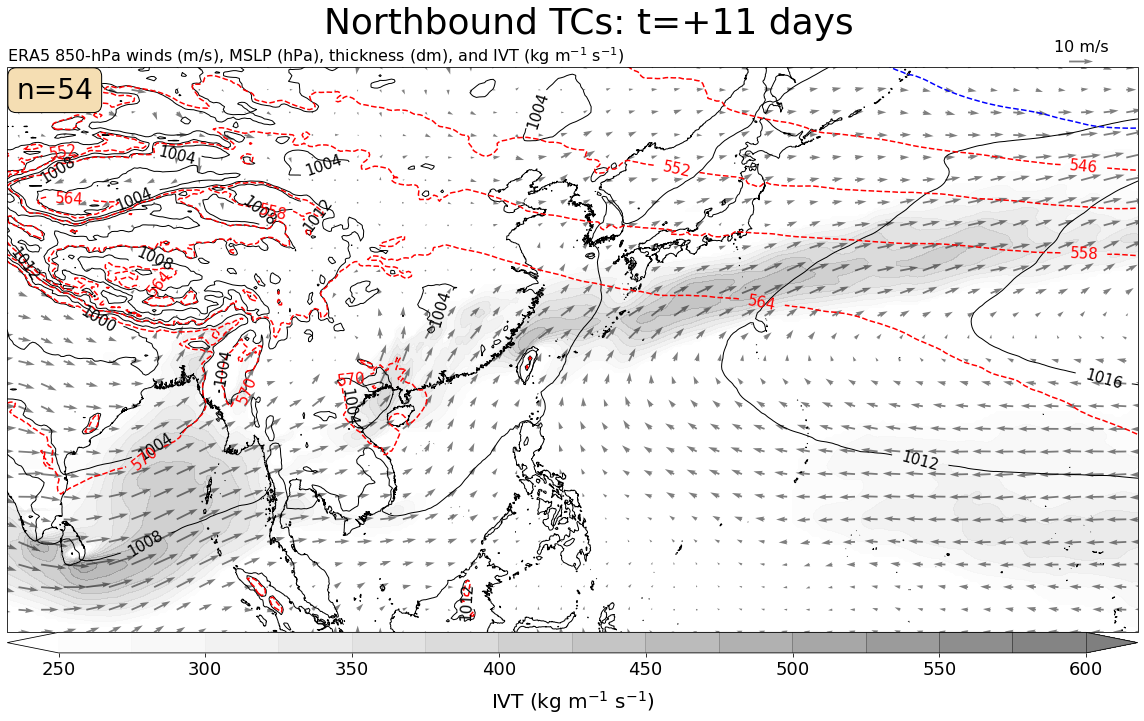

In [216]:
import matplotlib as mpl

slp_mean=slp_concat.mean(dim='time',skipna=True)
u_850_mean=u_850_concat.mean(dim='time',skipna=True)
v_850_mean=v_850_concat.mean(dim='time',skipna=True)
ivtx_mean=ivtx_concat.mean(dim='time',skipna=True)
ivty_mean=ivty_concat.mean(dim='time',skipna=True)
ivt_mag_mean=ivt_mag_concat.mean(dim='time',skipna=True)

ivt_mag_mean_calc=np.sqrt(ivtx_mean**2+ivty_mean**2)
thickness_mean=thickness_concat.mean(dim='time',skipna=True)

mapcrs = ccrs.PlateCarree(central_longitude=125)
fig = plt.figure(1, figsize=(16, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([75, 175, 0, 50], ccrs.PlateCarree())
ax.coastlines(resolution='10m')
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)

ivt_250=ivt_mag_mean_calc.where(ivt_mag_mean_calc>=250.)
cax1=ax.contourf(ivt_250.longitude,ivt_250.latitude,ivt_250,levels=np.arange(250,625,25),extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.Greys,alpha=0.5)
            
cbar = plt.colorbar(cax1, orientation='horizontal', pad=0, aspect=50,fraction=0.046)
cbar.set_label('IVT (kg m$^{-1}$ s$^{-1}$)',fontsize=20,labelpad=10)
cbar.ax.tick_params(labelsize=18)

c=ax.contour(slp_select.longitude,slp_select.latitude,slp_mean/100.,linewidths=1.0,transform=ccrs.PlateCarree(),colors='k',levels=np.arange(960,1040,4))
plt.clabel(c,fmt='%.00f',fontsize=15)

c1=ax.contour(thickness_mean.longitude,thickness_mean.latitude,thickness_mean/100.,linewidths=1.5,linestyles='--',transform=ccrs.PlateCarree(),colors=['b','b','b','b','b','r','r','r','r','r','r'],levels=np.arange(516,580,6))
plt.clabel(c1,fmt='%.00f',fontsize=15)

X=8
q=ax.quiver(u_850_select.longitude[0::X].values,u_850_select.latitude[0::X].values,u_850_mean[0::X,0::X].values,v_850_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=30,width=0.025,alpha=0.5)
ax.quiverkey(q,0.95,1.01,10,'10 m/s',fontproperties={'size':16})

#cax21=ax.contourf(ivtx.longitude,ivtx.latitude,ivt_250.where(ar_select==1),levels=np.arange(250,1040,50),extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.Greys,alpha=0.5,label='Identified AR')
#cax2=ax.contourf(ar_select.longitude,ar_select.latitude,ar_select,[0,1],colors='b',transform=ccrs.PlateCarree(),hatches=[None,'.'],alpha=0.1,label='Identified AR',zorder=20)

mpl.rcParams['hatch.linewidth']=0.01
vtime=date
plt.title('ERA5 850-hPa winds (m/s), MSLP (hPa), thickness (dm), and IVT (kg m$^{-1}$ s$^{-1}$)',loc='left',fontsize=16)
#plt.title('Valid Time: {}'.format(vtime), loc='right',fontsize=16)
ax.text(103,53,'Northbound TCs: t=+11 days',transform=ccrs.PlateCarree(),fontsize=36)#103
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.008, 0.984,'n='+str(len(dates_list_zone)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)
plt.tight_layout()
plt.show()

In [217]:
fig.savefig(dir+'northbound_tc_composites_20.png')

In [20]:
lat_tc=lat_tc.sel(storm=storms_select)
lon_tc=lon_tc.sel(storm=storms_select)
wind_tc=wind_tc.sel(storm=storms_select)
nature_tc=nature_tc.sel(storm=storms_select)
years_tc=years_tc.sel(storm=storms_select)
months_tc=months_tc.sel(storm=storms_select)
days_tc=days_tc.sel(storm=storms_select)
hours_tc=hours_tc.sel(storm=storms_select)

In [ ]:
print(years_tc.storm)
print(lat_tc.storm)
print(storms_select)

In [ ]:
for i in range(41):#41; 60
    year=1979+i
    #year=1960+i
    print(year)
    base=dt.datetime(year,5,8,6)#middle of first day (starts 18Z on 14th)
    dates_list_mys=[base+dt.timedelta(days=x) for x in range(47+28)]
    ds=xr.open_dataset(dir_rain+'rain.'+str(year)+'.daily.1km-grid-v2.nc')
    p=ds.rain
    dates=[]
    for j in range(len(ds.time)):
        dates.append(dt.datetime(year,1,1,6)+dt.timedelta(j))
    p['time']=dates#now have datetime objects
    p_mys=p.sel(time=dates_list_mys)
    
    if i==0:
        p_mys_all=p_mys
    else:
        p_mys_all=xr.concat([p_mys_all,p_mys],dim='time')

In [ ]:
ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan.nc')
p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
threshold=ds['threshold_99']
dates=ds.large_scale_extreme_days.values
print(dates)

ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

zipped_t1=list(zip(dates,ar_yesno4))
zipped_t2=list(zip(dates,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates,tc_yesno4))
zipped_t5=list(zip(dates,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates,tc_remnants_yesno4))
zipped_t8=list(zip(dates,ivt_yesno4))
zipped_t9=list(zip(dates,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates,other_yesno4))

dates_t1=[x[0] for x in zipped_t1 if x[1]==1]
dates_t2=[x[0] for x in zipped_t2 if x[1]==1]
dates_t3=[x[0] for x in zipped_t3 if x[1]==1]
dates_t4=[x[0] for x in zipped_t4 if x[1]==1]
dates_t5=[x[0] for x in zipped_t5 if x[1]==1]
dates_t6=[x[0] for x in zipped_t6 if x[1]==1]
dates_t7=[x[0] for x in zipped_t7 if x[1]==1]
dates_t8=[x[0] for x in zipped_t8 if x[1]==1]
dates_t9=[x[0] for x in zipped_t9 if x[1]==1]
dates_t10=[x[0] for x in zipped_t10 if x[1]==1]
dates_t11=[x[0] for x in zipped_t11 if x[1]==1]
print(dates_t1)

In [ ]:
ds5=xr.open_dataset(dir+'taiwan_ar_climo_mys.nc')
print(ds5)
ar=ds5.ar
tc_trop=ds5.tc_trop
tc_nontrop=ds5.tc_nontrop
labeled=ds5['labeled']
print(ar.time)

In [12]:
dg1=xr.open_dataset(dir+'era_5_annual_ivtx_taiwan_box.nc')
ivtx=dg1['p71.162']
dg2=xr.open_dataset(dir+'era_5_annual_ivty_taiwan_box.nc')
ivty=dg2['p72.162']

In [ ]:
lon_range_ar=np.arange(119.5,122.5,0.25)
lat_range_ar=np.arange(21.25,26,0.25)


precip_average_list=[]
count_valid_list=[]
ar_present_sum_list=[]
ivt_average_list=[]

freq_t1_list=[]
freq_t2_list=[]
freq_t3_list=[]
freq_t4_list=[]
freq_t5_list=[]
freq_t6_list=[]
freq_t7_list=[]
freq_t8_list=[]
freq_t9_list=[]
freq_t10_list=[]
freq_t11_list=[]

for i in range(-7,21):
    count_valid=0
    dates_adjusted=[x+dt.timedelta(days=i) for x in dates_days]

    p_select=p_mys_all.sel(time=dates_adjusted)
    p_mean=p_select.mean(dim=('lat','lon'),skipna=True).values.tolist()
    p_mean=float(sum(p_mean))/float(len(p_mean))
    precip_average_list.append(p_mean)
    
    select_dates_t1=[x for x in dates_t1 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t2=[x for x in dates_t2 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t3=[x for x in dates_t3 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t4=[x for x in dates_t4 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t5=[x for x in dates_t5 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t6=[x for x in dates_t6 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t7=[x for x in dates_t7 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t8=[x for x in dates_t8 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t9=[x for x in dates_t9 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t10=[x for x in dates_t10 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    select_dates_t11=[x for x in dates_t11 if pd.to_datetime(x) in pd.DatetimeIndex(dates_adjusted)]
    
    freq_t1_list.append(len(select_dates_t1))
    freq_t2_list.append(len(select_dates_t2))
    freq_t3_list.append(len(select_dates_t3))
    freq_t4_list.append(len(select_dates_t4))
    freq_t5_list.append(len(select_dates_t5))
    freq_t6_list.append(len(select_dates_t6))
    freq_t7_list.append(len(select_dates_t7))
    freq_t8_list.append(len(select_dates_t8))
    freq_t9_list.append(len(select_dates_t9))
    freq_t10_list.append(len(select_dates_t10))
    freq_t11_list.append(len(select_dates_t11))
    
    ar_present_sum=0
    ivt_mags_list=[]
    for j in range(len(dates_adjusted)):
        day_range=[dates_adjusted[j]+dt.timedelta(hours=-12+6*x) for x in range(4)]
        
        ivtx_select=ivtx.sel(time=day_range,latitude=lat_range_ar,longitude=lon_range_ar)
        ivty_select=ivty.sel(time=day_range,latitude=lat_range_ar,longitude=lon_range_ar)
        
        ivt_mag_select=np.sqrt(ivtx_select**2+ivty_select**2)
        ivt_mag_mean=ivt_mag_select.mean(skipna=True).values
        ivt_mags_list.append(ivt_mag_mean)  
        
        try:
            ar_select=ar.sel(time=day_range)
            ar_select=ar_select.sel(latitude=lat_range_ar,longitude=lon_range_ar)
            ar_max=ar_select.max(skipna=True).values.tolist()
            if ar_max==1:
                ar_present_sum=ar_present_sum+1
            count_valid=count_valid+1
            
            
            
        except KeyError:
            pass
    ivt_average_list.append(float(sum(ivt_mags_list))/float(len(ivt_mags_list)))
    count_valid_list.append(count_valid)
    ar_present_sum_list.append(ar_present_sum)
print(precip_average_list)
print(count_valid_list)
print(ar_present_sum_list)
print(ivt_average_list)


ar_rate_list=[x/y for x,y in zip(ar_present_sum_list,count_valid_list)]

max_count=max(count_valid_list)
freq_t1_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t1_list,count_valid_list)]
freq_t2_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t2_list,count_valid_list)]
freq_t3_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t3_list,count_valid_list)]
freq_t4_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t4_list,count_valid_list)]
freq_t5_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t5_list,count_valid_list)]
freq_t6_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t6_list,count_valid_list)]
freq_t7_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t7_list,count_valid_list)]
freq_t8_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t8_list,count_valid_list)]
freq_t9_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t9_list,count_valid_list)]
freq_t10_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t10_list,count_valid_list)]
freq_t11_list=[float(x)/float(y)*float(max_count) for x,y in zip(freq_t11_list,count_valid_list)]

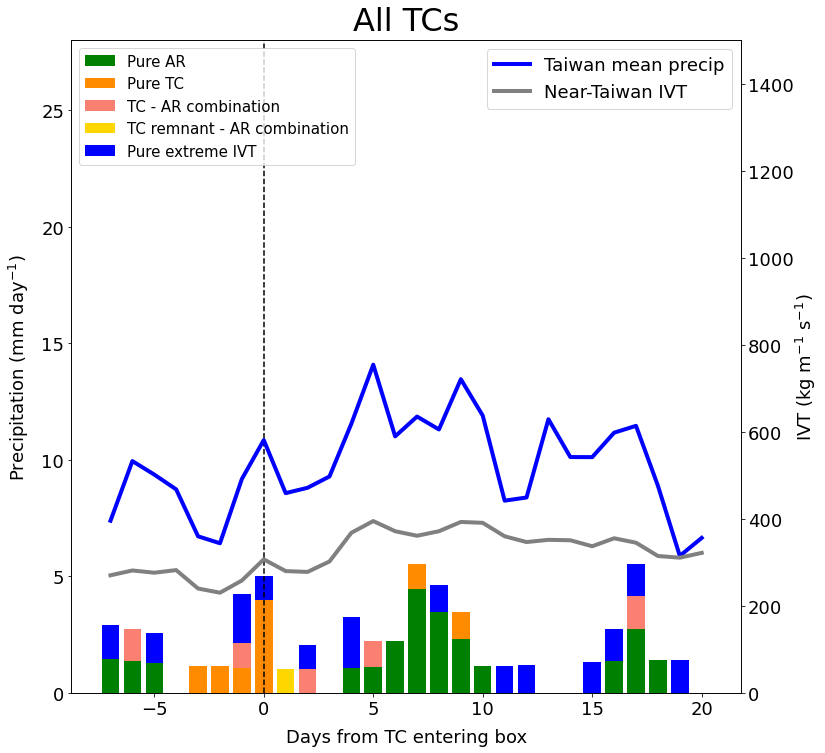

In [14]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)

day_range=np.arange(-7,21)

#ax.set_ylim(0,20)
ax.set_ylim(0,28)
ax.tick_params(labelsize=18)
#ax.set_title('North-bound TC vs Taiwan conditions',fontsize=32)
ax.set_title('All TCs',fontsize=32,pad=10)
ax.set_xlabel('Days from TC entering box',fontsize=18,labelpad=10)
ax.set_ylabel('Precipitation (mm day$^{-1}$)',fontsize=18,labelpad=10)
plt.axvline(x=0,linestyle='--',linewidth=1.5,color='k')
#ax.grid(True)

if 1==0:#ar rate
    for i in range(len(ar_rate_list)):
        ax.plot([-7+i,-7+i],[0,ar_rate_list[i]*10.],color='k',linewidth=1.0)
    ax.scatter(day_range,[x*10 for x in ar_rate_list],c='k',s=40,label='Near-Taiwan AR')
    lns3=ax.plot(day_range,[x*10 for x in ar_rate_list],c='k',label='Near-Taiwan AR frequency')
    ax.text(4.5,2.5,str(round(ar_rate_list[6+6],2)),fontsize=16)
if 1==1:#weather types
    ax.bar(day_range,freq_t1_list,width=0.8,color='g',label='Pure AR')
    ax.bar(day_range,freq_t2_list,bottom=freq_t1_list,width=0.8,color='limegreen')#,label='TC-linked AR')
    ax.bar(day_range,freq_t3_list,bottom=[x+y for x,y in zip(freq_t1_list,freq_t2_list)],width=0.8,color='palegreen')#,label='TC remnant-linked AR')

    ax.bar(day_range,freq_t4_list,bottom=[x+y+z for x,y,z in zip(freq_t1_list,freq_t2_list,freq_t3_list)],width=0.8,color='darkorange',label='Pure TC')
    ax.bar(day_range,freq_t5_list,bottom=[x+y+z+w for x,y,z,w in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list)],width=0.8,color='salmon',label='TC - AR combination')
    ax.bar(day_range,freq_t6_list,bottom=[x+y+z+w+q for x,y,z,w,q in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list,freq_t5_list)],width=0.8,color='gold',label='TC remnant - AR combination')
    ax.bar(day_range,freq_t7_list,bottom=[x+y+z+w+q+t for x,y,z,w,q,t in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list,freq_t5_list,freq_t6_list)],width=0.8,color='navajowhite')#,label='TC remnants')

    ax.bar(day_range,freq_t8_list,bottom=[x+y+z+w+q+t+t1 for x,y,z,w,q,t,t1 in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list,freq_t5_list,freq_t6_list,freq_t7_list)],width=0.8,color='b',label='Pure extreme IVT')
    ax.bar(day_range,freq_t9_list,bottom=[x+y+z+w+q+t+t1+t2 for x,y,z,w,q,t,t1,t2 in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list,freq_t5_list,freq_t6_list,freq_t7_list,freq_t8_list)],width=0.8,color='dodgerblue')#,label='TC-linked extreme IVT')
    ax.bar(day_range,freq_t10_list,bottom=[x+y+z+w+q+t+t1+t2+t3 for x,y,z,w,q,t,t1,t2,t3 in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list,freq_t5_list,freq_t6_list,freq_t7_list,freq_t8_list,freq_t9_list)],width=0.8,color='cyan')#,label='TC remnant-linked extreme IVT')

    ax.bar(day_range,freq_t11_list,bottom=[x+y+z+w+q+t+t1+t2+t3+t4 for x,y,z,w,q,t,t1,t2,t3,t4 in zip(freq_t1_list,freq_t2_list,freq_t3_list,freq_t4_list,freq_t5_list,freq_t6_list,freq_t7_list,freq_t8_list,freq_t9_list,freq_t10_list)],width=0.8,color='gray')#,label='Unspecified')


ax.legend(loc='upper left',fontsize=15)
lns1=ax.plot(day_range,precip_average_list,color='b',linewidth=4,label='Taiwan mean precip')

ax1=ax.twinx()
lns2=ax1.plot(np.arange(-7,21),ivt_average_list,color='gray',linewidth=4.0,label='Near-Taiwan IVT')
ax1.set_ylim(0,1500)
ax1.set_ylabel('IVT (kg m$^{-1}$ s$^{-1}$)',fontsize=18,labelpad=0)

lns=lns1+lns2#+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=18)

#plt.legend(loc='upper left',fontsize=12)
ax1.tick_params(labelsize=18)

plt.show()

In [15]:
fig.savefig(dir+'taiwan_northbound_tc_11.png')

2749
2750
2790
2791
2825
2860
2861
2863
2964
2967
2968
3003
3042
3043
3070
3072
3118
3159
3200
3236
3321
3368
3408
3409
3456
3459
3557
3559
3560
3634
3668
3669
3670
3697
3700
3702
3732
3784
3814
3815
3816
3898
3925
3926
3927
3952
3994
4020
4116
4117
4119


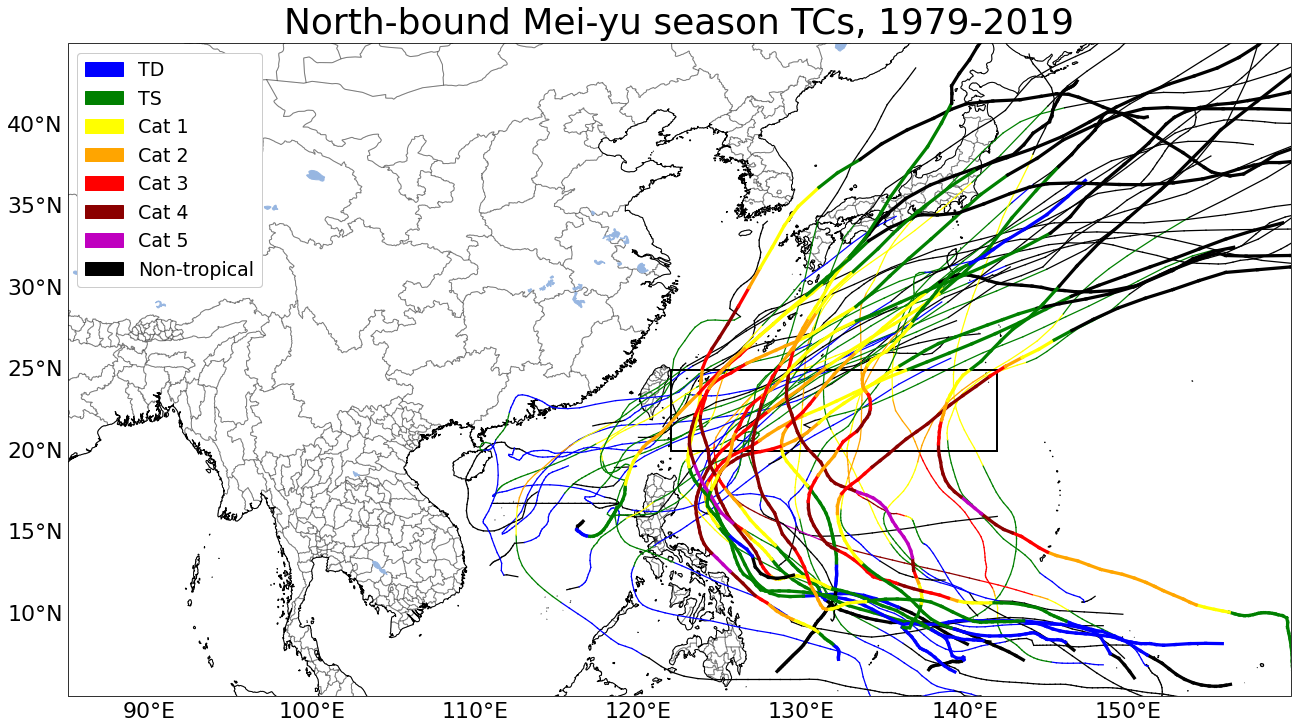

In [22]:
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches
from matplotlib import pyplot

month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
proj_map = ccrs.PlateCarree()
fig = plt.figure(figsize=(24,12))
ax=plt.subplot(1,1,1,projection=proj_map)
segs=[]
count_major=0
if 1==1:
    for i in lat_tc.storm.values:
        print(i)
        if 1==1:
            storm_lat=lat_tc.sel(storm=i).values.tolist()
            storm_lon=lon_tc.sel(storm=i).values.tolist()
            storm_year=years_tc.sel(storm=i).values.tolist()
            storm_month=months_tc.sel(storm=i).values.tolist()
            storm_day=days_tc.sel(storm=i).values.tolist()
            storm_hour=hours_tc.sel(storm=i).values.tolist()
            storm_wind=wind_tc.sel(storm=i).values.tolist()
            storm_nature=nature_tc.sel(storm=i).values.tolist()
            #storm_month=[x for x in storm_month if x>=0]
            #storm_day=[x for x in storm_day if x>=0]
            #storm_hour=[x for x in storm_hour if x>=0]
            #storm_date=[pd.to_datetime(dt.datetime(int(w),int(x),int(y),int(z))) for w,x,y,z in zip(storm_year,storm_month,storm_day,storm_hour)]
            #storm_wind=[x for x in storm_wind if x>=0]
            #print(len(storm_month))
            #print(len(storm_wind))
            #zipped_latlon=list(zip(storm_lat,storm_lon,storm_date,storm_wind,storm_nature))

            if 1==1:
                for j in range(len(storm_month)-1):
                    lat_1=storm_lat[j]
                    lon_1=storm_lon[j]
                    lat_2=storm_lat[j+1]
                    lon_2=storm_lon[j+1]
                    starting_wind=storm_wind[j]#in kts
                    starting_nature=storm_nature[j]
                    #now choose color based on category
                    if starting_nature==1:
                        if starting_wind<=33:
                            color='b'
                        if 34<=starting_wind<=63:
                            color='g'
                        if 64<=starting_wind<=82:
                            color='yellow'
                        if 83<=starting_wind<=95:
                            color='orange'
                        if 96<=starting_wind<=112:
                            color='r'
                        if 113<=starting_wind<=136:
                            color='darkred'
                        if starting_wind>=137:
                            color='m'
                    else:
                        color='k'

                    seg=[[lon_1,lat_1],[lon_2,lat_2]]
                    if i in storms_select1:
                        ax.plot([lon_1,lon_2],[lat_1,lat_2],transform=ccrs.PlateCarree(),linewidth=3.25,color=color,zorder=100+count_major)
                        count_major=count_major+1
                    else:
                        ax.plot([lon_1,lon_2],[lat_1,lat_2],transform=ccrs.PlateCarree(),linewidth=1.25,color=color)
                    segs.append(seg)

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
ax.add_feature(cfeature.LAKES.with_scale('50m'))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([85,160,5,45],crs=ccrs.PlateCarree())

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160]
yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
ax.tick_params(labelsize=20)
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0)
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlabel_style={'size':22,'color':'k'}
g1.ylabel_style={'size':22,'color':'k'}
g1.top_labels=False
g1.right_labels=False

props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
#ax.text(0.945, 0.9875,'n='+str(len(dates_ar_first)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)
#ax.text(0.93, 0.9875,'n='+str(len(dates_other_second)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)
ax.set_title('North-bound Mei-yu season TCs, 1979-2019',fontsize=36,pad=10)#2000 - 2019; 1979-1999

patch1 = mpatches.Patch(color='b', alpha=1,label='TD')
patch2 = mpatches.Patch(color='g', alpha=1,label='TS')
patch3 = mpatches.Patch(color='yellow', alpha=1,label='Cat 1')
patch4 = mpatches.Patch(color='orange', alpha=1,label='Cat 2')
patch5 = mpatches.Patch(color='r', alpha=1,label='Cat 3')
patch6 = mpatches.Patch(color='darkred', alpha=1,label='Cat 4')
patch7 = mpatches.Patch(color='m', alpha=1,label='Cat 5')
patch8 = mpatches.Patch(color='k', alpha=1,label='Non-tropical')

legend1=pyplot.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6,patch7,patch8],loc='upper left',prop={'size':19},fancybox=True, framealpha=1.0)
pyplot.gca().add_artist(legend1)

#box 2
if 1==1:
    ax.plot([lon_min_2,lon_min_2],[lat_min_2,lat_max_2],color='k',linewidth=2.0)
    ax.plot([lon_min_2,lon_max_2],[lat_max_2,lat_max_2],color='k',linewidth=2.0)
    ax.plot([lon_max_2,lon_max_2],[lat_max_2,lat_min_2],color='k',linewidth=2.0)
    ax.plot([lon_max_2,lon_min_2],[lat_min_2,lat_min_2],color='k',linewidth=2.0)

plt.show()

In [23]:
fig.savefig(dir+'taiwan_northbound_tracks_10.png')

In [ ]:
print(years_tc)
years_list=[]
for i in range(years_tc.storm.size):
    years_list.append(years_tc[i,0].values.tolist())
print(years_list)
yrs_neusa=np.arange(1979,2020,1)
bars=[]
for i in range(len(yrs_neusa)):
    year=yrs_neusa[i]
    select_year=[x for x in years_list if x==year]
    bars.append(len(select_year))

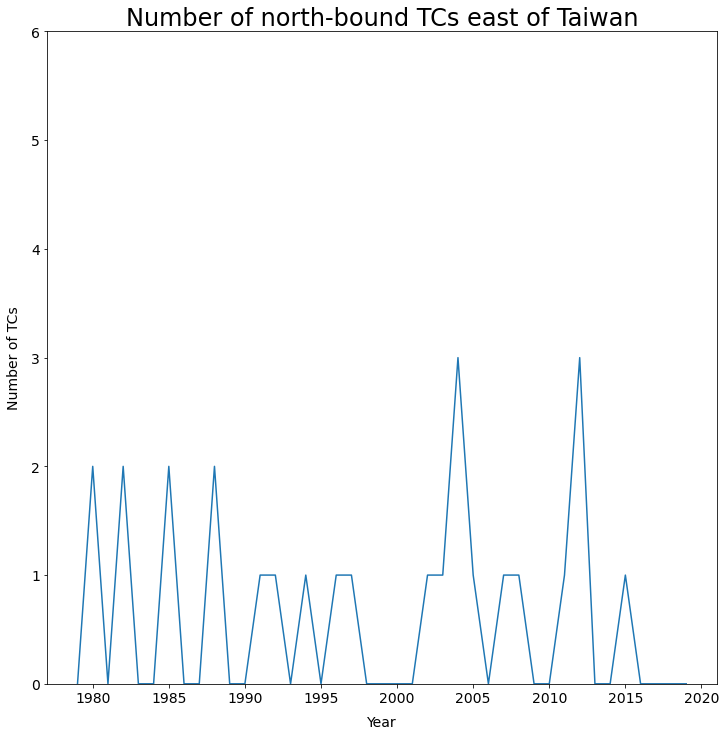

In [78]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(yrs_neusa,bars)
ax.set_ylim(0,6)
ax.set_title('Number of north-bound TCs east of Taiwan',fontsize=24)
ax.tick_params(labelsize=14)
ax.set_xlabel('Year',fontsize=14,labelpad=10)
ax.set_ylabel('Number of TCs',fontsize=14,labelpad=10)
plt.show()

In [ ]:
dc=xr.open_dataset(dir+'taiwan_mys_vars_define.nc')
slp_all_mean=dc['slp_all_mean']
u_850_all_mean=dc['u_850_all_mean']
v_850_all_mean=dc['v_850_all_mean']
ivt_mag_all_mean=dc['ivt_mag_all_mean']

slp_four_mean=dc['slp_four_mean']
u_850_four_mean=dc['u_850_four_mean']
v_850_four_mean=dc['v_850_four_mean']
ivt_mag_four_mean=dc['ivt_mag_four_mean']

slp_all=dc['slp_all']
u_850_all=dc['u_850_all']
v_850_all=dc['v_850_all']
ivt_mag_all=dc['ivt_mag_all']

print(slp_all)

In [ ]:
ds1=xr.open_dataset(dir+'ivt_basics_taiwan_95.nc')
ivt_threshold=ds1['ivt_threshold']
ivt_mag=ds1['ivt_mag']
ivtx=ds1['ivtx']
ivty=ds1['ivty']
print(ds1.latitude[0::4])
print(ds1.longitude[0::4])

In [ ]:
lats_tc_list=lat_tc.values.ravel()
lons_tc_list=lon_tc.values.ravel()
years_tc_list=years_tc.values.ravel()
months_tc_list=months_tc.values.ravel()
days_tc_list=days_tc.values.ravel()
nature_tc_list=nature_tc.values.ravel()
wind_tc_list=wind_tc.values.ravel()

zipped_tc=list(zip(lats_tc_list,lons_tc_list,years_tc_list,months_tc_list,days_tc_list,wind_tc_list,nature_tc_list))
nonzero_tc=[x for x in zipped_tc if x[0]>=0]
#mys_tc=[x for x in nonzero_tc if x[3]==6 or x[3]==5 and x[4]>=15]
mys_tc=[x for x in nonzero_tc if x[3] in [10,11]]
mys_tc=[x for x in mys_tc if x[-1]==1]
#strong_tc=[x for x in mys_tc if x[-2]>=]

heat_map=xr.zeros_like(ivt_mag[0:len(np.arange(1900,2020,1)),0::4,0::4])
for i in range(len(np.arange(1900,2020,1))):
    year=1900+i
    print(year)
    select_year=[x for x in mys_tc if x[2]==year]
    for j in range(int(ds1.latitude.size/4)):
        for k in range(int(ds1.longitude.size/4)):
            lat_start=ds1.latitude.values[4*j]
            lon_start=ds1.longitude.values[4*k]
            select_lat_cond=[x for x in select_year if lat_start<=x[0]<lat_start+1.0]
            select_lon_cond=[x for x in select_lat_cond if lon_start<=x[1]<lon_start+1.0]
            sample_size=len(select_lon_cond)
            heat_map[i,j,k]=sample_size

In [6]:
heat_map_sum=heat_map.sum(dim='time',skipna=True)
print(heat_map_sum.max().values)

57.0


In [42]:
dk=xr.Dataset()
dk['track_density']=(('time','lat','lon'),heat_map)
dk.coords['time']=np.arange(1900,2020,1)
dk.coords['lat']=ds1.latitude[0::4]
dk.coords['lon']=ds1.longitude[0::4]
try:
    #os.remove(dir+'tc_track_density_wp_mys_trop.nc')
    #os.remove(dir+'tc_track_density_wp_typh.nc')
    os.remove(dir+'tc_track_density_wp_fall_trop.nc')
except OSError:
    pass
#dk.to_netcdf(dir+'tc_track_density_wp_mys_trop.nc',mode='w',format='NETCDF4')
#dk.to_netcdf(dir+'tc_track_density_wp_typh.nc',mode='w',format='NETCDF4')
dk.to_netcdf(dir+'tc_track_density_wp_fall_trop.nc',mode='w',format='NETCDF4')

In [27]:
df=xr.open_dataset(dir+'tc_track_density_wp_mys_trop.nc')
track_density=df['track_density']
track_density['lon']=ds1.longitude[0::4].values
track_density['lat']=ds1.latitude[0::4].values

df1=xr.open_dataset(dir+'tc_track_density_wp_mys.nc')
track_density1=df1['track_density']
track_density1['lon']=ds1.longitude[0::4].values
track_density1['lat']=ds1.latitude[0::4].values

In [ ]:
print(track_density)
track_density_decade=track_density[79:120,:,:]
track_density_sum=track_density_decade.sum(dim='time',skipna=True)/41.

(95, 149.75)
(0.0, 39.75)


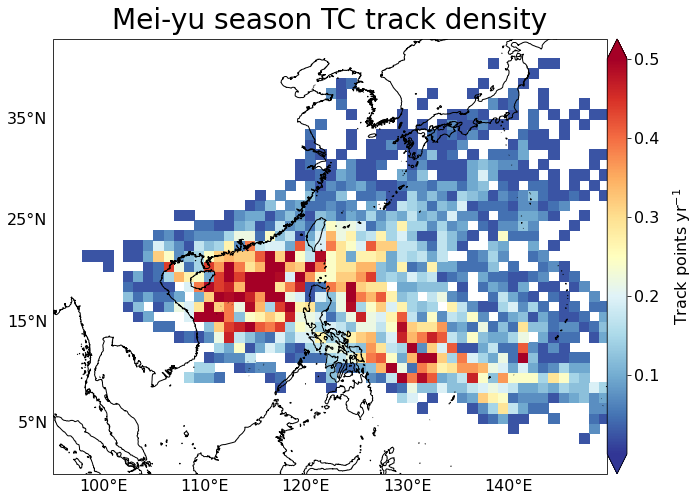

In [30]:
fig = plt.figure(figsize=(14,8))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
#cax=ax.pcolormesh(track_density.lon,track_density.lat,track_density_sum.where(track_density_sum>0),vmin=0,vmax=0.6,cmap=plt.cm.RdYlBu_r)
#cbar=plt.colorbar(cax,pad=0,fraction=0.043,ticks=[0.1,0.2,0.3,0.4,0.5,0.6])#mys


#cax=ax.pcolormesh(track_density.lon,track_density.lat,track_density_sum.where(track_density_sum>0),vmin=0,vmax=2,cmap=plt.cm.RdYlBu_r)
#cbar=plt.colorbar(cax,pad=0,fraction=0.043,ticks=[0.4,0.8,1.2,1.6])#typh

cax=ax.pcolormesh(track_density.lon,track_density.lat,track_density_sum.where(track_density_sum>0),vmin=0,vmax=0.5,cmap=plt.cm.RdYlBu_r)
cbar=plt.colorbar(cax,pad=0,fraction=0.043,extend='both',ticks=[0.1,0.2,0.3,0.4,0.5])#fall

ax.coastlines(resolution='10m')
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.5,color='gray',alpha=0.0,linestyle='--')
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('Track points yr$^{-1}$',fontsize=16,rotation=90,labelpad=12)
g1.xlabel_style={'size':16,'color':'k'}
g1.ylabel_style={'size':16,'color':'k'}
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlocator = mticker.FixedLocator([90,100,110,120,130,140])
g1.ylocator = mticker.FixedLocator([5,15,25,35])
    
lat_min_1=7
lat_max_1=18
lon_min_1=123
lon_max_1=145

lat_min_2=20
lat_max_2=25
lon_min_2=122
lon_max_2=142

lat_min_3=28
lat_max_3=35
lon_min_3=125
lon_max_3=145

#box 1
if 1==0:
    ax.plot([lon_min_1,lon_min_1],[lat_min_1,lat_max_1],color='k',linewidth=2.0)
    ax.plot([lon_min_1,lon_max_1],[lat_max_1,lat_max_1],color='k',linewidth=2.0)
    ax.plot([lon_max_1,lon_max_1],[lat_max_1,lat_min_1],color='k',linewidth=2.0)
    ax.plot([lon_max_1,lon_min_1],[lat_min_1,lat_min_1],color='k',linewidth=2.0)

#box 2
if 1==0:
    ax.plot([lon_min_2,lon_min_2],[lat_min_2,lat_max_2],color='k',linewidth=2.0)
    ax.plot([lon_min_2,lon_max_2],[lat_max_2,lat_max_2],color='k',linewidth=2.0)
    ax.plot([lon_max_2,lon_max_2],[lat_max_2,lat_min_2],color='k',linewidth=2.0)
    ax.plot([lon_max_2,lon_min_2],[lat_min_2,lat_min_2],color='k',linewidth=2.0)

#box 3
if 1==0:
    ax.plot([lon_min_3,lon_min_3],[lat_min_3,lat_max_3],color='k',linewidth=1.0)
    ax.plot([lon_min_3,lon_max_3],[lat_max_3,lat_max_3],color='k',linewidth=1.0)
    ax.plot([lon_max_3,lon_max_3],[lat_max_3,lat_min_3],color='k',linewidth=1.0)
    ax.plot([lon_max_3,lon_min_3],[lat_min_3,lat_min_3],color='k',linewidth=1.0)

latmin=ivt_mag.latitude.values[0]
latmax=ivt_mag.latitude.values[-1]-15
lonmin=ivt_mag.longitude.values[0]
lonmax=ivt_mag.longitude.values[-1]-10
g1.xlabels_top=False
g1.ylabels_right=False
print((95,lonmax))
print((latmin,latmax))
ax.set_extent([95,lonmax,latmin,latmax])
#ax.set_title('IBTrACS TC track density, 1979-2019',fontsize=24)
ax.set_title('Mei-yu season TC track density',fontsize=28,pad=10)
plt.show()

In [31]:
fig.savefig(dir+'tc_heatmap_taiwan_paper10.png')

In [ ]:
track_density_time_series=track_density.sum(dim=('lat','lon'),skipna=True).values.tolist()
track_density_time_series1=track_density1.sum(dim=('lat','lon'),skipna=True).values.tolist()
print(track_density_time_series)
print(track_density_time_series1)

In [33]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

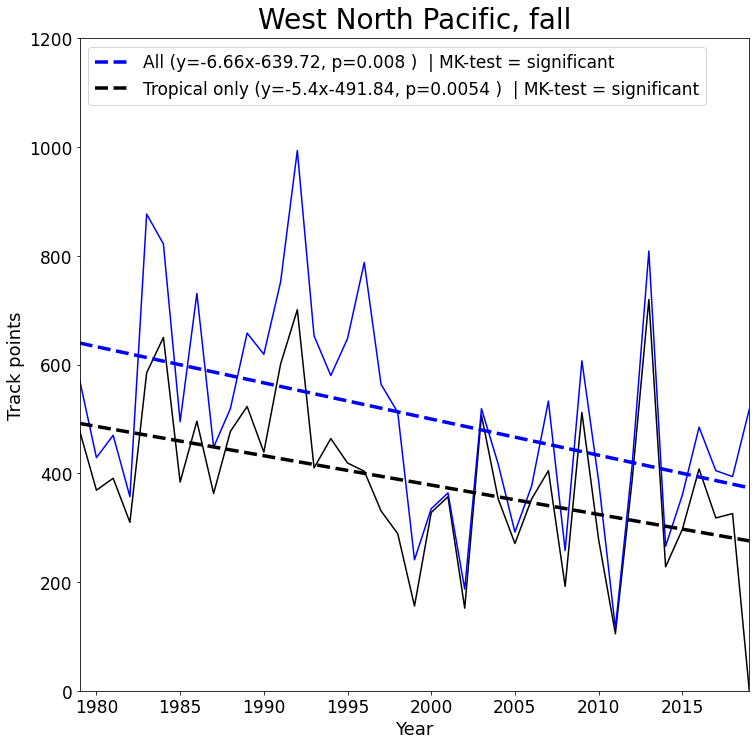

In [78]:
running_mean=[]
for i in range(110):
    slice=track_density_time_series[i:i+10]
    mean=float(sum(slice))/float(len(slice))
    running_mean.append(mean)
    
running_mean1=[]
for i in range(110):
    slice=track_density_time_series1[i:i+10]
    mean=float(sum(slice))/float(len(slice))
    running_mean1.append(mean)

track_density_time_3=track_density_time_series[79:]
linreg3=st.linregress(np.arange(41),track_density_time_3)
slope3=linreg3[0]
intercept3=linreg3[1]
p_value3=linreg3[3]
mk3=mk_test(track_density_time_3,alpha=0.05)

track_density_time_2=track_density_time_series1[79:]
linreg2=st.linregress(np.arange(41),track_density_time_2)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(track_density_time_2,alpha=0.05)



if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if mk3[0] in ['increasing','decreasing']:
    mk3_str='MK-test = significant'
else:
    mk3_str='MK-test = insignificant'

eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
eq_str3='y='+str(round(slope3,2))+'x-'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '


fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(np.arange(1900,2020,1),track_density_time_series,color='k',linewidth=1.5)
ax.plot(np.arange(1900,2020,1),track_density_time_series1,color='b',linewidth=1.5)
#ax.plot(np.arange(1905,2015,1),running_mean,color='k',linewidth=3.0)
#ax.plot(np.arange(1905,2015,1),running_mean1,color='darkblue',linewidth=3.0)

#ax.plot(np.arange(1900,1960,1),[slope1*x+intercept1 for x in np.arange(60)],color='r',linewidth=1.5,linestyle='--',label='1900-1959 ('+eq_str1+' | '+mk1_str)
ax.plot(np.arange(1979,2020,1),[slope2*x+intercept2 for x in np.arange(41)],color='b',linewidth=3.5,linestyle='--',label='All ('+eq_str2+' | '+mk2_str)
ax.plot(np.arange(1979,2020,1),[slope3*x+intercept3 for x in np.arange(41)],color='k',linewidth=3.5,linestyle='--',label='Tropical only ('+eq_str3+' | '+mk3_str)

#ax.set_ylim(0,625)#mys
#ax.set_ylim(0,2500)#typh
ax.set_ylim(0,1200)#fall

ax.set_xlim(1979,2019)
#ax.set_xlim(1940,2019)
ax.tick_params(labelsize=17)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Track points',fontsize=18)
ax.set_title('West North Pacific, fall',fontsize=28,pad=10)
plt.legend(loc='upper left',fontsize=17)

plt.show()

In [79]:
#fig.savefig(dir+'tc_activity_taiwan_1a.png')
fig.savefig(dir+'tc_heatmap_taiwan_paper2b.png')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 47.0, 23.0, 0.0, 21.0, 43.0, 9.0, 32.0, 32.0, 11.0, 0.0, 13.0, 25.0, 10.0, 0.0, 21.0, 75.0, 20.0, 73.0, 0.0, 63.0, 40.0, 17.0, 12.0, 0.0, 37.0, 24.0, 16.0, 1.0, 12.0, 0.0, 63.0, 21.0, 40.0, 19.0, 41.0, 50.0, 8.0, 0.0, 20.0, 50.0, 59.0, 19.0, 68.0, 11.0, 53.0, 18.0, 19.0, 6.0, 15.0, 35.0, 36.0, 29.0, 0.0, 15.0, 23.0, 18.0, 49.0, 45.0, 50.0, 0.0, 6.0, 0.0, 13.0, 36.0, 0.0, 68.0, 37.0, 18.0, 53.0, 0.0, 0.0, 4.0, 32.0, 0.0]


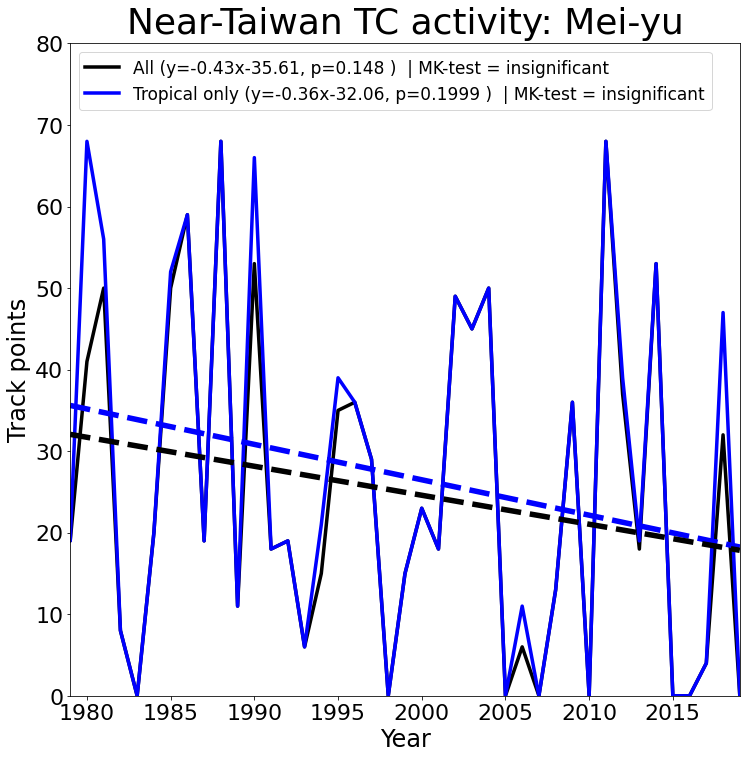

In [122]:
track_density_near_taiwan=track_density.sel(lat=np.arange(18,30,1),lon=np.arange(116,127,1))
track_density_time_series=track_density_near_taiwan.sum(dim=('lat','lon'),skipna=True).values.tolist()

track_density_near_taiwan1=track_density1.sel(lat=np.arange(18,30,1),lon=np.arange(116,127,1))
track_density_time_series1=track_density_near_taiwan1.sum(dim=('lat','lon'),skipna=True).values.tolist()
print(track_density_time_series)

running_mean=[]
for i in range(110):
    slice=track_density_time_series[i:i+10]
    mean=float(sum(slice))/float(len(slice))
    running_mean.append(mean)
    
running_mean1=[]
for i in range(110):
    slice=track_density_time_series1[i:i+10]
    mean=float(sum(slice))/float(len(slice))
    running_mean1.append(mean)

track_density_time_3=track_density_time_series[79:]
linreg3=st.linregress(np.arange(41),track_density_time_3)
slope3=linreg3[0]
intercept3=linreg3[1]
p_value3=linreg3[3]
mk3=mk_test(track_density_time_3,alpha=0.05)

track_density_time_2=track_density_time_series1[79:]
linreg2=st.linregress(np.arange(41),track_density_time_2)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(track_density_time_2,alpha=0.05)



if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if mk3[0] in ['increasing','decreasing']:
    mk3_str='MK-test = significant'
else:
    mk3_str='MK-test = insignificant'

eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
eq_str3='y='+str(round(slope3,2))+'x-'+str(abs(round(intercept3,2)))+', p='+str(round(p_value3,4))+' ) '


fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(np.arange(1900,2020,1),track_density_time_series,color='k',linewidth=3.5,label='All ('+eq_str2+' | '+mk2_str)
ax.plot(np.arange(1900,2020,1),track_density_time_series1,color='b',linewidth=3.5,label='Tropical only ('+eq_str3+' | '+mk3_str)
#ax.plot(np.arange(1905,2015,1),running_mean,color='k',linewidth=3.0)
#ax.plot(np.arange(1905,2015,1),running_mean1,color='darkblue',linewidth=3.0)

#ax.plot(np.arange(1900,1960,1),[slope1*x+intercept1 for x in np.arange(60)],color='r',linewidth=1.5,linestyle='--',label='1900-1959 ('+eq_str1+' | '+mk1_str)
ax.plot(np.arange(1979,2020,1),[slope2*x+intercept2 for x in np.arange(41)],color='b',linewidth=5.5,linestyle='--')
ax.plot(np.arange(1979,2020,1),[slope3*x+intercept3 for x in np.arange(41)],color='k',linewidth=5.5,linestyle='--')

ax.set_ylim(0,80)#mys
#ax.set_ylim(0,400)#typh
#ax.set_ylim(0,120)#fall
ax.tick_params(labelsize=22)
ax.set_xlim(1979,2019)
ax.set_xlabel('Year',fontsize=24)
ax.set_ylabel('Track points',fontsize=24)
ax.set_title('Near-Taiwan TC activity: Mei-yu',fontsize=36,pad=10)
plt.legend(loc='upper left',fontsize=17)

plt.show()

In [123]:
#fig.savefig(dir+'tc_activity_taiwan_2a.png')
fig.savefig(dir+'tc_heatmap_taiwan_paper3.png')

In [ ]:
track_density_79=track_density[79:,:,:]
print(track_density_79)
slopes_array=xr.zeros_like(track_density[0,:,:])
sigs_array=xr.zeros_like(track_density[0,:,:])
for i in range(track_density.lat.size):
    print(i)
    for j in range(track_density.lon.size):
        time_series=track_density_79[:,i,j].values.tolist()
        mk_result=mk_test(time_series,alpha=0.05)[0]
        linreg=st.linregress(np.arange(1979,2020,1),time_series)
        slope=linreg[0]
        slopes_array[i,j]=slope
        if mk_result in ['increasing','decreasing']:
            sigs_array[i,j]=1
        else:
            sigs_array[i,j]=0

(95, 149.75)
(0.0, 39.75)


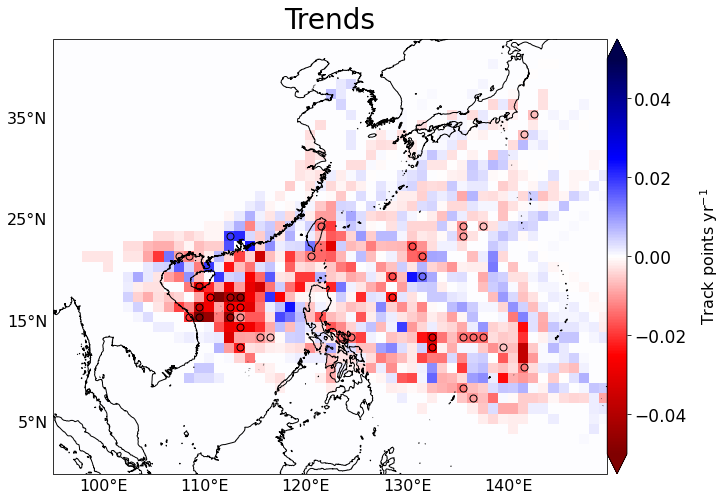

In [35]:
fig = plt.figure(figsize=(14,8))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
cax=ax.pcolormesh(track_density.lon,track_density.lat,slopes_array,vmin=-0.05,vmax=0.05,cmap=plt.cm.seismic_r)#mys
#cax=ax.pcolormesh(track_density.lon,track_density.lat,slopes_array,vmin=-0.10,vmax=0.10,cmap=plt.cm.seismic_r)#typh
#cax=ax.pcolormesh(track_density.lon,track_density.lat,slopes_array,vmin=-0.075,vmax=0.075,cmap=plt.cm.seismic_r)#fall


cbar=plt.colorbar(cax,pad=0,fraction=0.043,extend='both',ticks=[-0.04,-0.02,0,0.02,0.04])#mys
#cbar=plt.colorbar(cax,pad=0,fraction=0.043,ticks=[-0.08,-0.04,0,0.04,0.08])#typh
#cbar=plt.colorbar(cax,pad=0,fraction=0.043,ticks=[-0.06,-0.03,0,0.03,0.06])#fall
ax.coastlines(resolution='10m')
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1.5,color='gray',alpha=0.0,linestyle='--')
cbar.ax.tick_params(labelsize=17) 
cbar.set_label('Track points yr$^{-1}$',fontsize=16,rotation=90,labelpad=12)
g1.xlabel_style={'size':16,'color':'k'}
g1.ylabel_style={'size':16,'color':'k'}
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlocator = mticker.FixedLocator([90,100,110,120,130,140,150])
g1.ylocator = mticker.FixedLocator([5,15,25,35,45])
    
for i in range(track_density.lat.size):
    for j in range(track_density.lon.size):
        if sigs_array[i,j].values==1:
            ax.plot(track_density.lon[int(j)]+0.5,track_density.lat[int(i)]+0.5,marker='o',color='k',markersize=7,mew=1,markerfacecolor='None',zorder=20)


latmin=ivt_mag.latitude.values[0]
latmax=ivt_mag.latitude.values[-1]-15
lonmin=ivt_mag.longitude.values[0]
lonmax=ivt_mag.longitude.values[-1]-10
g1.xlabels_top=False
g1.ylabels_right=False
print((95,lonmax))
print((latmin,latmax))
ax.set_extent([95,lonmax,latmin,latmax])
ax.set_title('Trends',fontsize=28,pad=10)
plt.show()

In [36]:
fig.savefig(dir+'tc_heatmap_taiwan_paper11.png')

In [ ]:
northward_storms_list=[]
years_northward_list=[]
for i in range(lat_tc.storm.size):
    if i%100==0:
        print(i)
    lat_list=lat_tc[i,:].values.tolist()
    lon_list=lon_tc[i,:].values.tolist()
    year=int(years_tc[i,0].values.tolist())
    wind_list=wind_tc[i,:].values.tolist()
    months_list=months_tc[i,:].values.tolist()
    days_list=days_tc[i,:].values.tolist()
    zipped_latlon=list(zip(np.arange(len(lat_list)),lat_list,lon_list,months_list,days_list,wind_list))
    
    select_box=[x for x in zipped_latlon if lat_min_2<=x[1]<=lat_max_2 and lon_min_2<=x[2]<=lon_max_2]
    select_box=[x for x in select_box if x[3]==6 or x[3]==5 and x[4]>=15]
    select_box=[x for x in select_box if x[5]>=96]
    
    
    indices_box=[x[0] for x in select_box]
    lats_box=[x[1] for x in select_box]
    lons_box=[x[2] for x in select_box]
    count_storm=0
    for j in range(len(indices_box)):
        index=indices_box[j]
        lat_index=lats_box[j]
        lon_index=lons_box[j]
        next_lat=lat_list[index+1]
        next_lon=lon_list[index+1]
        
        if next_lat>=lat_index and next_lon>=lon_index and count_storm==0:
            northward_storms_list.append(i)
            years_northward_list.append(year)
            count_storm=1
print(years_northward_list)

No handles with labels found to put in legend.


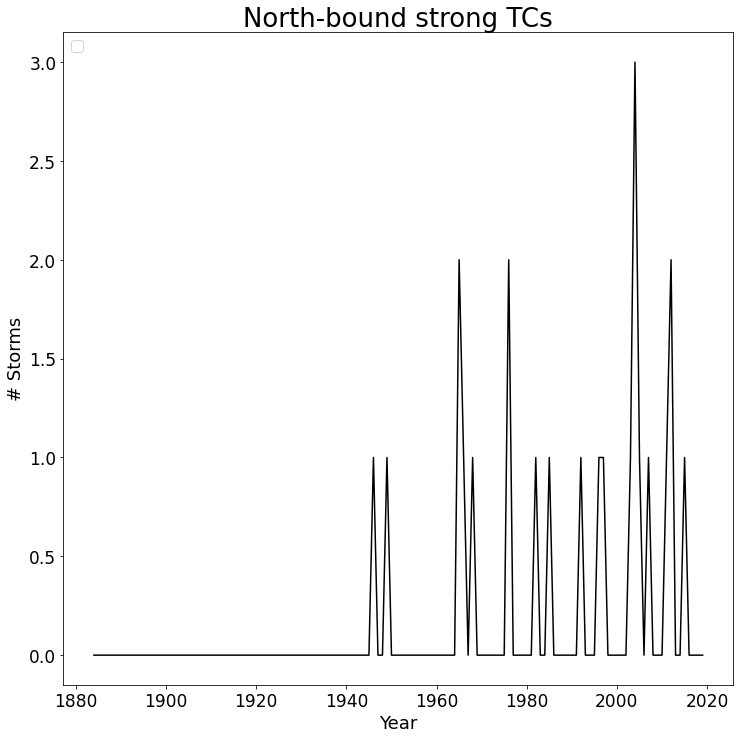

In [89]:
freq_northward=[]
for i in range(1884,2020,1):
    year=i
    select_year=[x for x in years_northward_list if x==year]
    len_year=len(select_year)
    freq_northward.append(len_year)
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(np.arange(1884,2020,1),freq_northward,color='k',linewidth=1.5)
#ax.plot(np.arange(1900,2020,1),track_density_time_series1,color='b',linewidth=1.5)
#ax.plot(np.arange(1905,2015,1),running_mean,color='k',linewidth=3.0)
#ax.plot(np.arange(1905,2015,1),running_mean1,color='darkblue',linewidth=3.0)

#ax.plot(np.arange(1900,1960,1),[slope1*x+intercept1 for x in np.arange(60)],color='r',linewidth=1.5,linestyle='--',label='1900-1959 ('+eq_str1+' | '+mk1_str)
#ax.plot(np.arange(1979,2020,1),[slope2*x+intercept2 for x in np.arange(41)],color='b',linewidth=3.5,linestyle='--',label='All ('+eq_str2+' | '+mk2_str)
#ax.plot(np.arange(1979,2020,1),[slope3*x+intercept3 for x in np.arange(41)],color='k',linewidth=3.5,linestyle='--',label='Tropical only ('+eq_str3+' | '+mk3_str)

#ax.set_ylim(0,80)
ax.tick_params(labelsize=17)
#ax.set_xlim(1979,2019)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('# Storms',fontsize=18)
ax.set_title('North-bound strong TCs',fontsize=26)
plt.legend(loc='upper left',fontsize=15)

plt.show()